# ML class final project part3
##  Almog Shor
## Yehudit Brickner

imports

In [1]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import time
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

create the data set with all of the features

In [2]:
def create_df1(folder):

    folder_dir= os.listdir(folder)
    
    big_list=[]
    my_list=[]
    count=0
    c=0
    for i in folder_dir:
        print(i)
        j = os.listdir(folder+"/"+i)
        if i in ['american_football','basketball','hockey_puck','shuttlecock']:
            for k in range(len(j)):
                try:
                    img = cv2.imread(folder+"/"+i+"/"+j[k], cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img,(200,200), interpolation = cv2.INTER_AREA)
                    
                    # histogram_r, bin_edges = np.histogram(img[:, :, 0], bins=256, range=(0, 256)) 
                    # histogram_g, bin_edges = np.histogram(img[:, :, 1], bins=256, range=(0, 256)) 
                    # histogram_b, bin_edges = np.histogram(img[:, :, 2], bins=256, range=(0, 256)) 
                    
                    # dst = cv2.Canny(img, 50, 200, None, 3)
                    # dst1 = cv2.Canny(img, 50, 200, None, 3)
                    # lines = cv2.HoughLines(dst1, 1, np.pi / 180, 50, None, 0, 0)
                    
                    # gray = cv2.imread(folder+"/"+i+"/"+j[k],cv2.IMREAD_GRAYSCALE)
                    # gray =  cv2.resize(gray,(200,200), interpolation = cv2.INTER_AREA)
                    # gray = cv2.medianBlur(gray, 5)
                    # rows = gray.shape[0]
                    # circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                    #                 param1=100, param2=30,
                    #                 minRadius=10, maxRadius=100)
                    
                    my_list=[]
                    my_list.append(folder+"/"+i+"/"+j[k])
                    my_list.append(i)
                    my_list.append(c)
                    # if lines is None:
                    #     my_list.append(0)
                    #     my_list.append(0)   
                    # else:
                    #     my_list.append(1)
                    #     my_list.append(len(lines))
                    # if circles is None:
                    #     my_list.append(0)
                    #     my_list.append(0)   
                    # else:
                    #     my_list.append(1)
                    #     my_list.append(circles.shape[1])
                    
                    # my_list.extend(histogram_r)
                    # my_list.extend(histogram_g)
                    # my_list.extend(histogram_b)
                    my_list.extend(img.flatten())
                    # my_list.extend(dst.flatten())

                    big_list.append(my_list)
                    count+=1
                    
                except:
                    print("there was an error with count ",count)

        c+=1

    
    print("creating df")
    # cols = ['path','class_name','class_number','lines?','#lines','circles?','#circles']
    cols = ['path','class_name','class_number']
    # for h in range(256):
    #     cols.append("r"+str(h))
    # for h in range(256):
    #     cols.append("g"+str(h))
    # for h in range(256):
    #     cols.append("b"+str(h))
    for h in range(200*200*3):
        cols.append("i"+str(h))
    # for h in range(200*200):
    #     cols.append("e"+str(h))

    df = pd.DataFrame(big_list, columns = cols) 

    print("created df")
              
    return df

In [3]:
# folder ="C:/Users/nechd/Downloads/ball_classification/train"
# start_time = time.time()
# full_ball_edge_df = create_df1(folder) 
# end_time = time.time()
# print("time taken: ",end_time - start_time)

In [4]:
# full_ball_edge_df.shape
# full_ball_edge_df.head()

In [5]:
# full_ball_edge_df.to_csv('image.csv', index=False)

In [6]:
# folder ="C:/Users/nechd/Downloads/ball_classification/test"
# start_time = time.time()
# full_test_df = create_df1(folder) 
# end_time = time.time()
# print("time taken: ",end_time - start_time)

In [7]:
# full_test_df.to_csv('final_test_data_image.csv', index=False)

import the data with some/all features

In [8]:
image = pd.read_csv('image.csv')
del image['path']
del image['class_name']
ball_type = [0,2,9,11]
image_4balls = image.loc[image['class_number'].isin(ball_type)]
print(image_4balls.shape)
image_4balls_no_na = image_4balls.dropna()
print(image_4balls_no_na.shape)

(1543, 120001)
(1533, 120001)


In [9]:
test_data3 = pd.read_csv('final_test_data_image.csv')
del test_data3['path']
del test_data3['class_name']
ball_type = [0,2,9,11]
test_data3 = test_data3.loc[test_data3['class_number'].isin(ball_type)]
test_data3 = test_data3.dropna()
test_data3.shape

(383, 120001)

In [10]:
X = image_4balls_no_na.drop(['class_number'], axis=1)
y = image_4balls_no_na['class_number']

final_test_X = test_data3.drop(['class_number'], axis=1)
final_test_y = test_data3['class_number']

train test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

extra functions

In [12]:
# function to represent the confusion matrix nicely
def Confusion_Matrix(cf_matrix):
    plt.figure(figsize=(6,6))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Greens')

In [13]:
# list to hold all final results
results=[]

model imports

In [14]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression



# RUN ON DATA SET OF IMAGE PCA 100

In [15]:
pca1=PCA(n_components=100)
X_train6=pca1.fit_transform(X_train)
X_test6=pca1.transform(X_test)
final_test_X6=pca1.transform(final_test_X)
y_train6 = y_train
y_test6 = y_test

print(X_train6.shape)
print(X_test6.shape)
print(final_test_X6.shape)



(1073, 100)
(460, 100)
(383, 100)


In [16]:
cs = [i for i in range(100)]
df_X6_final_test = pd.DataFrame(final_test_X6,columns=cs)
cy =[]
for i in final_test_y:
    cy.append(i)
df_X6_final_test['class_number']=cy
df_X6_final_test.to_csv('df_X6_final_test.csv', index=False)

#### SVM

In [17]:
losses = ["hinge","squared_hinge"]
penalties = ["l1","l2"]

print("OneVsOneClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train6, y_train6)
            pred_svm = svm.predict(X_test6)
            print(i,j,round(np.sum([y_test6==pred_svm])/len(y_test6),4)*100,"%")
        except:
            pass

print("OutputCodeClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OutputCodeClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train6, y_train6)
            pred_svm = svm.predict(X_test6)
            print(i,j,round(np.sum([y_test6==pred_svm])/len(y_test6),4)*100,"%")
        except:
            pass


print("OneVsRestClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsRestClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train6, y_train6)
            pred_svm = svm.predict(X_test6)
            print(i,j,round(np.sum([y_test6==pred_svm])/len(y_test6),4)*100,"%")
        except:
            pass

OneVsOneClassifier
hinge l2 45.43 %
squared_hinge l2 45.43 %
OutputCodeClassifier
hinge l2 45.0 %
squared_hinge l2 40.65 %
OneVsRestClassifier
hinge l2 46.96 %
squared_hinge l2 46.96 %


              precision    recall  f1-score   support

           0       0.45      0.43      0.44       110
           2       0.43      0.42      0.42       100
           9       0.24      0.20      0.22       111
          11       0.59      0.71      0.64       139

    accuracy                           0.45       460
   macro avg       0.43      0.44      0.43       460
weighted avg       0.44      0.45      0.44       460

45.43 %


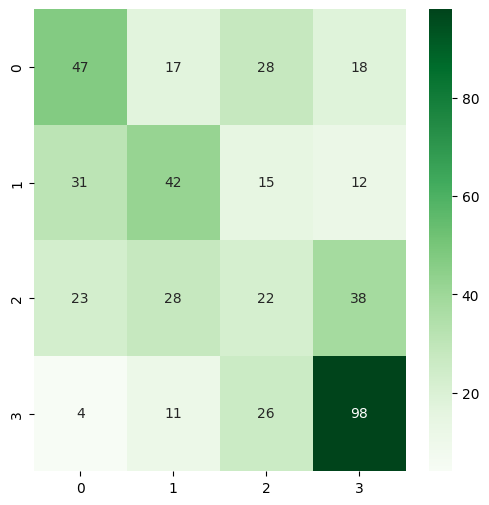

In [18]:
svm6 =  OneVsOneClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train6, y_train6)
pred_svm6 = svm6.predict(X_test6)
Confusion_Matrix(confusion_matrix(y_test6,pred_svm6))
print(classification_report(y_test6, pred_svm6))
print(round(np.sum([y_test6==pred_svm6])/len(y_test6),4)*100,"%")
results.append(['images PCA 100', 'SVM',round(np.sum([y_test6==pred_svm6])/len(y_test6),4)*100 ])

#### KNN

In [19]:
for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train6,y_train6)
    pred_knn = neigh.predict(X_test6)
    print(i,round(np.sum([y_test6==pred_knn])/len(y_test6),4)*100,"%")

1 61.09 %
2 56.089999999999996 %
3 56.74 %
4 54.779999999999994 %
5 54.56999999999999 %
6 54.779999999999994 %
7 55.22 %
8 54.13 %
9 56.3 %
10 56.74 %
11 56.74 %
12 55.43 %
13 55.00000000000001 %
14 54.13 %
15 52.17 %
16 54.779999999999994 %
17 54.35 %
18 54.13 %
19 54.56999999999999 %
20 53.7 %
21 54.35 %
22 54.35 %
23 55.00000000000001 %
24 55.00000000000001 %
25 55.65 %
26 55.87 %
27 55.00000000000001 %
28 55.00000000000001 %
29 54.35 %
30 54.56999999999999 %
31 54.779999999999994 %
32 55.22 %
33 55.22 %
34 54.35 %
35 54.13 %
36 53.26 %
37 53.910000000000004 %
38 54.779999999999994 %
39 55.43 %
40 54.35 %
41 55.22 %
42 55.22 %
43 54.779999999999994 %
44 54.13 %
45 53.26 %
46 53.910000000000004 %
47 53.480000000000004 %
48 51.959999999999994 %
49 51.959999999999994 %
50 52.61 %


              precision    recall  f1-score   support

           0       0.57      0.56      0.57       110
           2       0.61      0.61      0.61       100
           9       0.59      0.50      0.54       111
          11       0.66      0.74      0.70       139

    accuracy                           0.61       460
   macro avg       0.60      0.60      0.60       460
weighted avg       0.61      0.61      0.61       460

61.09 %


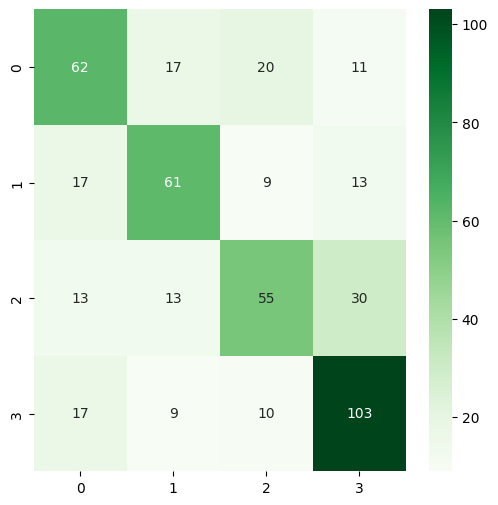

In [20]:
neigh6 = KNeighborsClassifier(n_neighbors=1)
neigh6.fit(X_train6,y_train6)
pred_knn6 = neigh6.predict(X_test6)
Confusion_Matrix(confusion_matrix(y_test6,pred_knn6))
print(classification_report(y_test6, pred_knn6))
print(round(np.sum([y_test6==pred_knn6])/len(y_test6),4)*100,"%")
results.append(['images PCA 100', 'KNN',round(np.sum([y_test6==pred_knn6])/len(y_test6),4)*100 ])

#### Adaboost

In [21]:
for i in range(50,2001,50):
    ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME", random_state=0)
    ada.fit(X_train6,y_train6)
    pred_ada = ada.predict(X_test6)
    print(i,round(np.sum([y_test6==pred_ada])/len(y_test6),4)*100,"%")

50 51.300000000000004 %
100 50.64999999999999 %
150 54.35 %
200 53.7 %
250 53.26 %
300 51.519999999999996 %
350 57.38999999999999 %
400 53.7 %
450 53.480000000000004 %
500 52.83 %
550 54.56999999999999 %
600 54.56999999999999 %
650 52.39 %
700 53.26 %
750 53.910000000000004 %
800 54.35 %
850 55.00000000000001 %
900 55.65 %
950 54.56999999999999 %
1000 55.43 %
1050 55.43 %
1100 55.00000000000001 %
1150 54.779999999999994 %
1200 54.779999999999994 %
1250 55.22 %
1300 56.52 %
1350 56.3 %
1400 55.65 %
1450 56.52 %
1500 56.74 %
1550 56.089999999999996 %
1600 56.52 %
1650 57.17 %
1700 57.38999999999999 %
1750 57.60999999999999 %
1800 56.74 %
1850 56.52 %
1900 56.96 %
1950 56.96 %
2000 56.74 %


              precision    recall  f1-score   support

           0       0.44      0.53      0.48       110
           2       0.49      0.49      0.49       100
           9       0.47      0.41      0.43       111
          11       0.76      0.72      0.74       139

    accuracy                           0.55       460
   macro avg       0.54      0.54      0.54       460
weighted avg       0.55      0.55      0.55       460

54.779999999999994 %


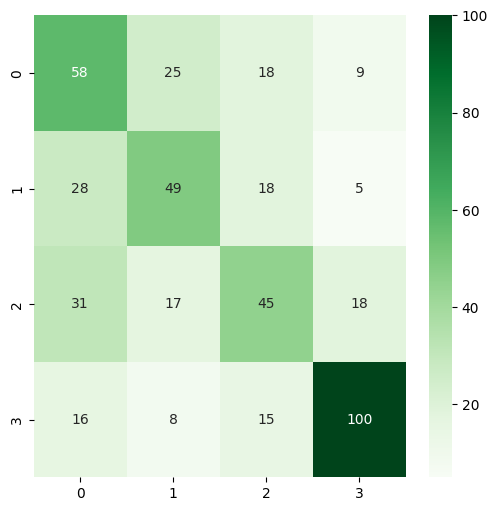

In [22]:
ada6 = AdaBoostClassifier(n_estimators=1200, algorithm="SAMME",random_state=0)
ada6.fit(X_train6,y_train6)
pred_ada6 = ada6.predict(X_test6)
Confusion_Matrix(confusion_matrix(y_test6,pred_ada6))
print(classification_report(y_test6, pred_ada6))
print(round(np.sum([y_test6==pred_ada6])/len(y_test6),4)*100,"%")
results.append(['images PCA 100', 'Adaboost',round(np.sum([y_test6==pred_ada6])/len(y_test6),4)*100 ])

#### Random Forest

In [23]:
for i in range(40,501,20):
    for j in range(2,5):
        RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
        RF.fit(X_train6,y_train6)
        pred_RF = RF.predict(X_test6)
        print(i,j,round(np.sum([y_test6==pred_RF])/len(y_test6),4)*100,"%")

40 2 58.91 %
40 3 64.57000000000001 %
40 4 59.78 %
60 2 60.650000000000006 %
60 3 64.57000000000001 %
60 4 62.17 %
80 2 62.61 %
80 3 63.91 %
80 4 61.96 %
100 2 62.39 %
100 3 65.0 %
100 4 63.480000000000004 %
120 2 61.96 %
120 3 66.3 %
120 4 62.39 %
140 2 63.91 %
140 3 66.09 %
140 4 61.739999999999995 %
160 2 64.57000000000001 %
160 3 66.3 %
160 4 62.39 %
180 2 64.78 %
180 3 64.78 %
180 4 61.739999999999995 %
200 2 65.64999999999999 %
200 3 65.64999999999999 %
200 4 63.260000000000005 %
220 2 66.09 %
220 3 65.64999999999999 %
220 4 63.04 %
240 2 65.42999999999999 %
240 3 66.3 %
240 4 63.480000000000004 %
260 2 66.52 %
260 3 67.17 %
260 4 64.13 %
280 2 67.61 %
280 3 66.52 %
280 4 64.57000000000001 %
300 2 66.74 %
300 3 65.86999999999999 %
300 4 64.57000000000001 %
320 2 67.39 %
320 3 66.52 %
320 4 64.78 %
340 2 67.17 %
340 3 67.17 %
340 4 64.57000000000001 %
360 2 66.96 %
360 3 66.09 %
360 4 65.0 %
380 2 67.61 %
380 3 65.42999999999999 %
380 4 63.7 %
400 2 67.83 %
400 3 65.64999999999999

              precision    recall  f1-score   support

           0       0.51      0.66      0.58       110
           2       0.66      0.49      0.56       100
           9       0.65      0.50      0.57       111
          11       0.69      0.78      0.73       139

    accuracy                           0.62       460
   macro avg       0.63      0.61      0.61       460
weighted avg       0.63      0.62      0.62       460

62.39 %


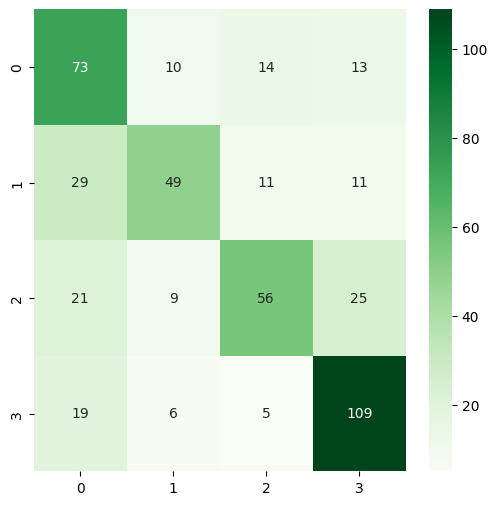

In [24]:
RF6 = RandomForestClassifier(n_estimators=120, max_depth=None,min_samples_split=4, random_state=0)
RF6.fit(X_train6,y_train6)
pred_RF6 = RF6.predict(X_test6)
Confusion_Matrix(confusion_matrix(y_test6,pred_RF6))
print(classification_report(y_test6, pred_RF6))
print(round(np.sum([y_test6==pred_RF6])/len(y_test6),4)*100,"%")
results.append(['images PCA 100', 'Random Forest',round(np.sum([y_test6==pred_RF6])/len(y_test6),4)*100 ])

#### Logistic Regression

In [25]:
penilties = ["l1","l2","elasticnet"]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
tols= [0.1 ,0.01, 0.001]

for i in penilties:
    for j in solvers:
        for k in tols:
            try:
                LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000,random_state=0)
                LR.fit(X_train6,y_train6)
                pred_LR = LR.predict(X_test6)
                print(i,j,k,round(np.sum([y_test6==pred_LR])/len(y_test6),4)*100,"%")
            except:
                pass
        

l1 liblinear 0.1 54.56999999999999 %
l1 liblinear 0.01 54.35 %
l1 liblinear 0.001 54.56999999999999 %
l1 saga 0.1 57.17 %
l1 saga 0.01 56.089999999999996 %
l1 saga 0.001 55.43 %
l2 lbfgs 0.1 55.65 %
l2 lbfgs 0.01 55.65 %
l2 lbfgs 0.001 55.65 %
l2 liblinear 0.1 55.65 %
l2 liblinear 0.01 55.00000000000001 %
l2 liblinear 0.001 53.910000000000004 %
l2 newton-cg 0.1 53.910000000000004 %
l2 newton-cg 0.01 53.910000000000004 %
l2 newton-cg 0.001 53.910000000000004 %
l2 sag 0.1 55.87 %
l2 sag 0.01 55.22 %
l2 sag 0.001 55.65 %
l2 saga 0.1 57.17 %
l2 saga 0.01 56.089999999999996 %
l2 saga 0.001 55.43 %


              precision    recall  f1-score   support

           0       0.54      0.56      0.55       110
           2       0.51      0.45      0.48       100
           9       0.52      0.33      0.41       111
          11       0.64      0.86      0.73       139

    accuracy                           0.57       460
   macro avg       0.55      0.55      0.54       460
weighted avg       0.56      0.57      0.56       460

57.17 %


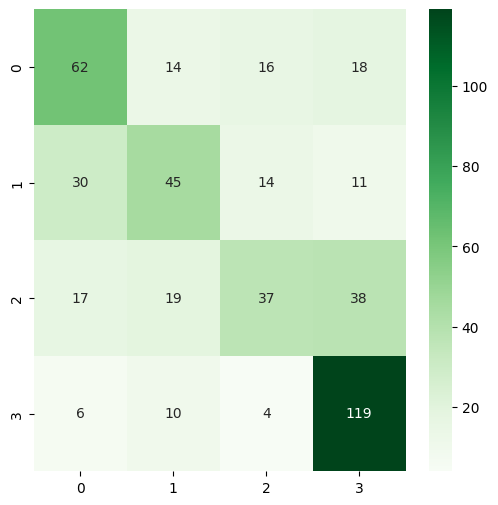

In [26]:
LR6 = LogisticRegression(penalty="l1", solver="saga", tol=0.1, max_iter=10000, random_state=0)
LR6.fit(X_train6,y_train6)
pred_LR6 = LR6.predict(X_test6)
Confusion_Matrix(confusion_matrix(y_test6,pred_LR6))
print(classification_report(y_test6, pred_LR6))
print(round(np.sum([y_test6==pred_LR6])/len(y_test6),4)*100,"%")
results.append(['images PCA 100', 'Logistic Regression',round(np.sum([y_test6==pred_LR6])/len(y_test6),4)*100 ])

# RUN ON DATA SET OF IMAGE PCA 200

In [27]:
pca2=PCA(n_components=200)
X_train7=pca2.fit_transform(X_train)
X_test7=pca2.transform(X_test)
final_test_X7=pca2.transform(final_test_X)
y_train7 = y_train
y_test7 = y_test

print(X_train7.shape)
print(X_test7.shape)
print(final_test_X7.shape)

cs = [i for i in range(200)]
df_X7_final_test = pd.DataFrame(final_test_X7,columns=cs)
cy =[]
for i in final_test_y:
    cy.append(i)
df_X7_final_test['class_number']=cy
df_X7_final_test.to_csv('df_X7_final_test.csv', index=False)

(1073, 200)
(460, 200)
(383, 200)


#### SVM

In [28]:
losses = ["hinge","squared_hinge"]
penalties = ["l1","l2"]

print("OneVsOneClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train7, y_train7)
            pred_svm = svm.predict(X_test7)
            print(i,j,round(np.sum([y_test7==pred_svm])/len(y_test7),4)*100,"%")
        except:
            pass

print("OutputCodeClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OutputCodeClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train7, y_train7)
            pred_svm = svm.predict(X_test7)
            print(i,j,round(np.sum([y_test7==pred_svm])/len(y_test7),4)*100,"%")
        except:
            pass


print("OneVsRestClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsRestClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train7, y_train7)
            pred_svm = svm.predict(X_test7)
            print(i,j,round(np.sum([y_test7==pred_svm])/len(y_test7),4)*100,"%")
        except:
            pass

OneVsOneClassifier
hinge l2 49.13 %
squared_hinge l2 49.13 %
OutputCodeClassifier
hinge l2 51.300000000000004 %
squared_hinge l2 49.13 %
OneVsRestClassifier
hinge l2 49.35 %
squared_hinge l2 49.35 %


              precision    recall  f1-score   support

           0       0.44      0.45      0.45       110
           2       0.45      0.51      0.48       100
           9       0.42      0.32      0.37       111
          11       0.60      0.64      0.62       139

    accuracy                           0.49       460
   macro avg       0.48      0.48      0.48       460
weighted avg       0.49      0.49      0.49       460

49.13 %


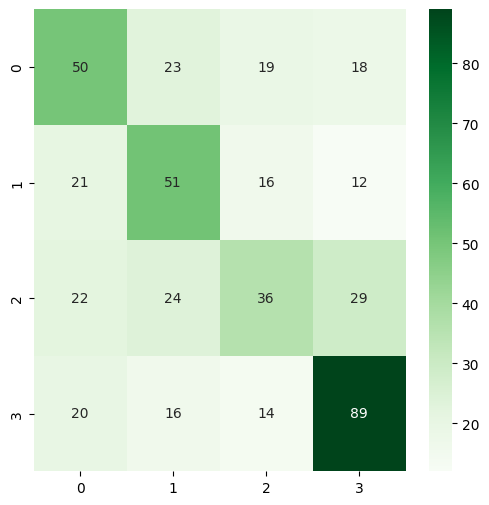

In [29]:
svm7 = OneVsOneClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train7, y_train7)
pred_svm7 = svm7.predict(X_test7)
Confusion_Matrix(confusion_matrix(y_test7,pred_svm7))
print(classification_report(y_test7, pred_svm7))
print(round(np.sum([y_test7==pred_svm7])/len(y_test7),4)*100,"%")
results.append(['images PCA 200', 'SVM',round(np.sum([y_test7==pred_svm7])/len(y_test7),4)*100 ])

#### KNN

In [30]:
for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train7,y_train7)
    pred_knn = neigh.predict(X_test7)
    print(i,round(np.sum([y_test7==pred_knn])/len(y_test7),4)*100,"%")

1 60.22 %
2 54.56999999999999 %
3 56.74 %
4 53.26 %
5 52.17 %
6 53.910000000000004 %
7 55.87 %
8 54.779999999999994 %
9 56.52 %
10 58.040000000000006 %
11 56.96 %
12 55.87 %
13 55.43 %
14 55.22 %
15 55.22 %
16 53.910000000000004 %
17 54.779999999999994 %
18 55.65 %
19 54.56999999999999 %
20 54.56999999999999 %
21 53.910000000000004 %
22 55.43 %
23 55.00000000000001 %
24 55.43 %
25 55.87 %
26 55.22 %
27 54.35 %
28 54.35 %
29 54.56999999999999 %
30 53.910000000000004 %
31 54.13 %
32 55.22 %
33 55.22 %
34 55.00000000000001 %
35 54.56999999999999 %
36 54.56999999999999 %
37 55.22 %
38 55.22 %
39 55.00000000000001 %
40 54.35 %
41 54.56999999999999 %
42 55.43 %
43 54.779999999999994 %
44 54.13 %
45 53.910000000000004 %
46 53.480000000000004 %
47 53.04 %
48 52.39 %
49 52.83 %
50 52.39 %


              precision    recall  f1-score   support

           0       0.56      0.56      0.56       110
           2       0.63      0.60      0.62       100
           9       0.54      0.47      0.50       111
          11       0.65      0.74      0.69       139

    accuracy                           0.60       460
   macro avg       0.60      0.59      0.59       460
weighted avg       0.60      0.60      0.60       460

60.22 %


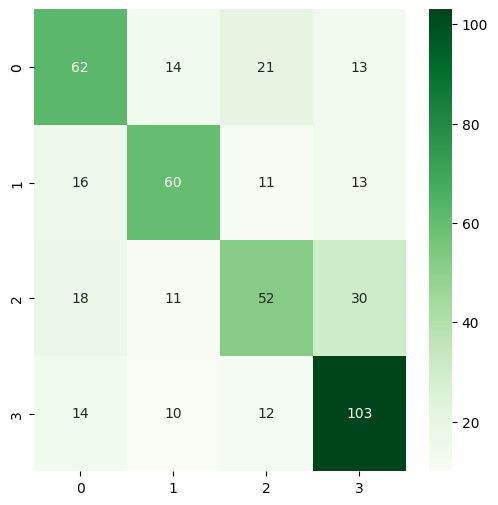

In [31]:
neigh7 = KNeighborsClassifier(n_neighbors=1)
neigh7.fit(X_train7,y_train7)
pred_knn7 = neigh7.predict(X_test7)
Confusion_Matrix(confusion_matrix(y_test7,pred_knn7))
print(classification_report(y_test7, pred_knn7))
print(round(np.sum([y_test7==pred_knn7])/len(y_test7),4)*100,"%")
results.append(['images PCA 200', 'KNN',round(np.sum([y_test7==pred_knn7])/len(y_test7),4)*100 ])

#### Adaboost

In [32]:
for i in range(50,2001,50):
    ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME", random_state=0)
    ada.fit(X_train7,y_train7)
    pred_ada = ada.predict(X_test7)
    print(i,round(np.sum([y_test7==pred_ada])/len(y_test7),4)*100,"%")

50 50.870000000000005 %
100 52.61 %
150 52.17 %
200 53.04 %
250 53.04 %
300 52.83 %
350 51.959999999999994 %
400 50.64999999999999 %
450 52.83 %
500 54.35 %
550 54.56999999999999 %
600 53.7 %
650 52.83 %
700 51.739999999999995 %
750 51.739999999999995 %
800 51.959999999999994 %
850 52.61 %
900 53.26 %
950 53.26 %
1000 53.04 %
1050 53.04 %
1100 52.61 %
1150 54.35 %
1200 54.779999999999994 %
1250 54.779999999999994 %
1300 53.480000000000004 %
1350 53.910000000000004 %
1400 54.13 %
1450 53.7 %
1500 53.26 %
1550 53.04 %
1600 51.300000000000004 %
1650 51.739999999999995 %
1700 51.300000000000004 %
1750 52.17 %
1800 51.959999999999994 %
1850 52.61 %
1900 52.83 %
1950 53.480000000000004 %
2000 52.83 %


              precision    recall  f1-score   support

           0       0.44      0.49      0.46       110
           2       0.49      0.44      0.46       100
           9       0.49      0.48      0.48       111
          11       0.70      0.69      0.69       139

    accuracy                           0.54       460
   macro avg       0.53      0.52      0.53       460
weighted avg       0.54      0.54      0.54       460

53.7 %


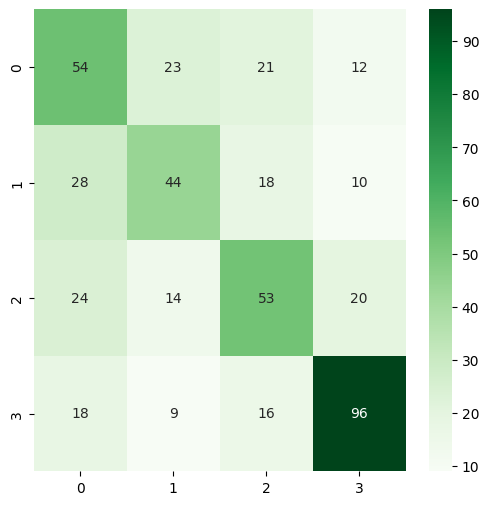

In [33]:
ada7 = AdaBoostClassifier(n_estimators=600, algorithm="SAMME",random_state=0)
ada7.fit(X_train7,y_train7)
pred_ada7 = ada7.predict(X_test7)
Confusion_Matrix(confusion_matrix(y_test7,pred_ada7))
print(classification_report(y_test7, pred_ada7))
print(round(np.sum([y_test7==pred_ada7])/len(y_test7),4)*100,"%")
results.append(['images PCA 200', 'Adaboost',round(np.sum([y_test7==pred_ada7])/len(y_test7),4)*100 ])

#### Random Forest

In [34]:
for i in range(40,501,20):
    for j in range(2,5):
        RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
        RF.fit(X_train7,y_train7)
        pred_RF = RF.predict(X_test7)
        print(i,j,round(np.sum([y_test7==pred_RF])/len(y_test7),4)*100,"%")

40 2 57.38999999999999 %
40 3 57.830000000000005 %
40 4 58.040000000000006 %
60 2 58.040000000000006 %
60 3 59.13 %
60 4 60.0 %
80 2 59.13 %
80 3 59.57 %
80 4 59.35 %
100 2 58.91 %
100 3 62.17 %
100 4 59.78 %
120 2 60.870000000000005 %
120 3 60.650000000000006 %
120 4 60.42999999999999 %
140 2 60.22 %
140 3 61.09 %
140 4 62.17 %
160 2 60.22 %
160 3 62.61 %
160 4 61.519999999999996 %
180 2 60.870000000000005 %
180 3 61.96 %
180 4 61.519999999999996 %
200 2 60.650000000000006 %
200 3 60.870000000000005 %
200 4 62.17 %
220 2 61.519999999999996 %
220 3 61.09 %
220 4 62.17 %
240 2 61.519999999999996 %
240 3 61.739999999999995 %
240 4 61.739999999999995 %
260 2 62.17 %
260 3 60.650000000000006 %
260 4 62.39 %
280 2 62.61 %
280 3 62.17 %
280 4 63.7 %
300 2 62.83 %
300 3 62.17 %
300 4 63.04 %
320 2 62.61 %
320 3 62.39 %
320 4 62.83 %
340 2 61.96 %
340 3 61.96 %
340 4 63.260000000000005 %
360 2 62.83 %
360 3 62.39 %
360 4 63.480000000000004 %
380 2 62.17 %
380 3 62.39 %
380 4 63.91 %
400 2 63.2

              precision    recall  f1-score   support

           0       0.49      0.67      0.57       110
           2       0.72      0.49      0.58       100
           9       0.69      0.53      0.60       111
          11       0.70      0.78      0.74       139

    accuracy                           0.63       460
   macro avg       0.65      0.62      0.62       460
weighted avg       0.65      0.63      0.63       460

63.260000000000005 %


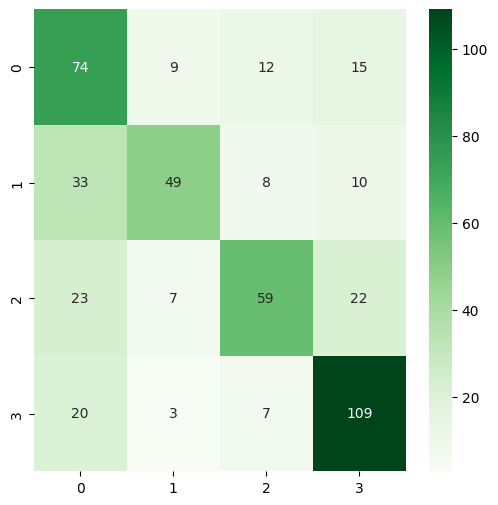

In [35]:
RF7 = RandomForestClassifier(n_estimators=400, max_depth=None,min_samples_split=2, random_state=0)
RF7.fit(X_train7,y_train7)
pred_RF7 = RF7.predict(X_test7)
Confusion_Matrix(confusion_matrix(y_test7,pred_RF7))
print(classification_report(y_test7, pred_RF7))
print(round(np.sum([y_test7==pred_RF7])/len(y_test7),4)*100,"%")
results.append(['images PCA 200', 'Random Forest',round(np.sum([y_test7==pred_RF7])/len(y_test7),4)*100 ])

#### Logistic Regression

In [36]:
penilties = ["l1","l2","elasticnet"]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
tols= [0.1 ,0.01, 0.001]

for i in penilties:
    for j in solvers:
        for k in tols:
            try:
                LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000,random_state=0)
                LR.fit(X_train7,y_train7)
                pred_LR = LR.predict(X_test7)
                print(i,j,k,round(np.sum([y_test7==pred_LR])/len(y_test7),4)*100,"%")
            except:
                pass
        

l1 liblinear 0.1 56.52 %
l1 liblinear 0.01 55.65 %
l1 liblinear 0.001 56.089999999999996 %
l1 saga 0.1 55.43 %
l1 saga 0.01 54.56999999999999 %
l1 saga 0.001 54.779999999999994 %
l2 lbfgs 0.1 54.779999999999994 %
l2 lbfgs 0.01 54.779999999999994 %
l2 lbfgs 0.001 54.779999999999994 %
l2 liblinear 0.1 54.35 %
l2 liblinear 0.01 55.87 %
l2 liblinear 0.001 55.43 %
l2 newton-cg 0.1 55.43 %
l2 newton-cg 0.01 55.43 %
l2 newton-cg 0.001 55.43 %
l2 sag 0.1 56.52 %
l2 sag 0.01 54.35 %
l2 sag 0.001 55.00000000000001 %
l2 saga 0.1 55.43 %
l2 saga 0.01 54.56999999999999 %
l2 saga 0.001 54.779999999999994 %


              precision    recall  f1-score   support

           0       0.51      0.51      0.51       110
           2       0.51      0.43      0.47       100
           9       0.46      0.39      0.42       111
          11       0.63      0.78      0.70       139

    accuracy                           0.55       460
   macro avg       0.53      0.53      0.52       460
weighted avg       0.53      0.55      0.54       460

54.56999999999999 %


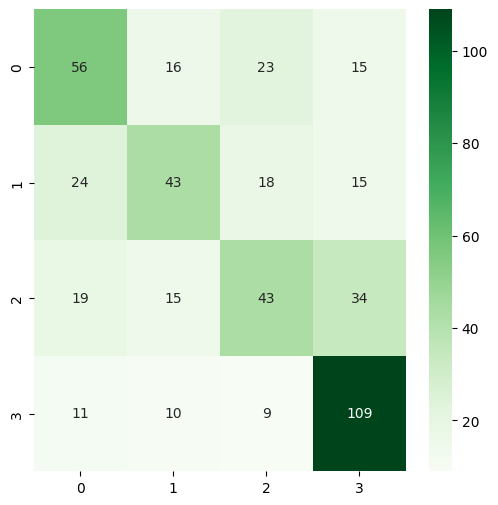

In [37]:
LR7 = LogisticRegression(penalty="l1", solver="saga", tol=0.01, max_iter=10000, random_state=0)
LR7.fit(X_train7,y_train7)
pred_LR7 = LR7.predict(X_test7)
Confusion_Matrix(confusion_matrix(y_test7,pred_LR7))
print(classification_report(y_test7, pred_LR7))
print(round(np.sum([y_test7==pred_LR7])/len(y_test7),4)*100,"%")
results.append(['images PCA 200', 'Logistic Regression',round(np.sum([y_test7==pred_LR7])/len(y_test7),4)*100 ])

# RUN ON DATA SET OF IMAGE PCA 500

In [38]:
pca3=PCA(n_components=500)
X_train9=pca3.fit_transform(X_train)
X_test9=pca3.transform(X_test)
final_test_X9=pca3.transform(final_test_X)
y_train9 = y_train
y_test9 = y_test

print(X_train9.shape)
print(X_test9.shape)
print(final_test_X9.shape)

cs = [i for i in range(500)]
df_X9_final_test = pd.DataFrame(final_test_X9,columns=cs)
cy =[]
for i in final_test_y:
    cy.append(i)
df_X9_final_test['class_number']=cy
df_X9_final_test.to_csv('df_X9_final_test.csv', index=False)

(1073, 500)
(460, 500)
(383, 500)


#### SVM

In [39]:
losses = ["hinge","squared_hinge"]
penalties = ["l1","l2"]

print("OneVsOneClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train9, y_train9)
            pred_svm = svm.predict(X_test9)
            print(i,j,round(np.sum([y_test9==pred_svm])/len(y_test9),4)*100,"%")
        except:
            pass

print("OutputCodeClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OutputCodeClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train9, y_train9)
            pred_svm = svm.predict(X_test9)
            print(i,j,round(np.sum([y_test9==pred_svm])/len(y_test9),4)*100,"%")
        except:
            pass


print("OneVsRestClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsRestClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train9, y_train9)
            pred_svm = svm.predict(X_test9)
            print(i,j,round(np.sum([y_test9==pred_svm])/len(y_test9),4)*100,"%")
        except:
            pass

OneVsOneClassifier
hinge l2 57.38999999999999 %
squared_hinge l2 57.38999999999999 %
OutputCodeClassifier
hinge l2 51.300000000000004 %
squared_hinge l2 51.519999999999996 %
OneVsRestClassifier
hinge l2 52.17 %
squared_hinge l2 52.17 %


              precision    recall  f1-score   support

           0       0.60      0.54      0.57       110
           2       0.54      0.61      0.57       100
           9       0.46      0.39      0.42       111
          11       0.65      0.73      0.69       139

    accuracy                           0.57       460
   macro avg       0.56      0.57      0.56       460
weighted avg       0.57      0.57      0.57       460

57.38999999999999 %


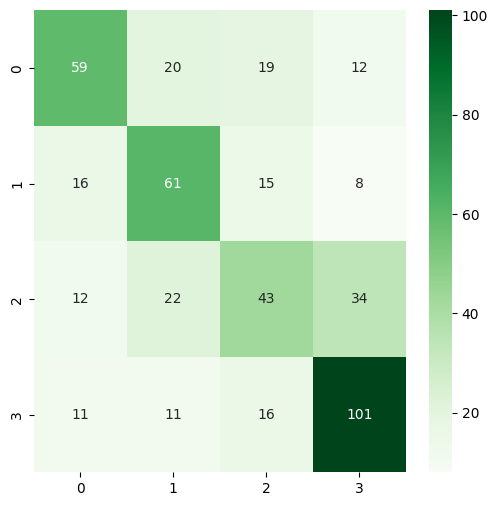

In [40]:
svm9 = OneVsOneClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train9, y_train9)
pred_svm9 = svm9.predict(X_test9)
Confusion_Matrix(confusion_matrix(y_test9,pred_svm9))
print(classification_report(y_test9, pred_svm9))
print(round(np.sum([y_test9==pred_svm9])/len(y_test9),4)*100,"%")
results.append(['images PCA 500', 'SVM',round(np.sum([y_test9==pred_svm9])/len(y_test9),4)*100 ])

#### KNN

In [41]:
for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train9,y_train9)
    pred_knn = neigh.predict(X_test9)
    print(i,round(np.sum([y_test9==pred_knn])/len(y_test9),4)*100,"%")

1 59.13 %
2 53.910000000000004 %
3 54.35 %
4 55.43 %
5 54.779999999999994 %
6 55.65 %
7 56.52 %
8 55.65 %
9 56.96 %
10 55.22 %
11 55.00000000000001 %
12 54.56999999999999 %
13 54.35 %
14 54.13 %
15 53.7 %
16 54.13 %
17 54.779999999999994 %
18 54.56999999999999 %
19 54.56999999999999 %
20 54.35 %
21 55.22 %
22 55.00000000000001 %
23 55.00000000000001 %
24 53.910000000000004 %
25 53.26 %
26 53.04 %
27 53.7 %
28 54.779999999999994 %
29 54.13 %
30 54.56999999999999 %
31 54.56999999999999 %
32 53.7 %
33 54.35 %
34 54.13 %
35 54.779999999999994 %
36 54.35 %
37 54.13 %
38 54.13 %
39 54.35 %
40 53.04 %
41 53.7 %
42 53.910000000000004 %
43 53.480000000000004 %
44 53.7 %
45 53.26 %
46 53.480000000000004 %
47 53.26 %
48 52.39 %
49 52.83 %
50 53.04 %


              precision    recall  f1-score   support

           0       0.57      0.55      0.56       110
           2       0.59      0.60      0.60       100
           9       0.52      0.44      0.48       111
          11       0.65      0.74      0.69       139

    accuracy                           0.59       460
   macro avg       0.58      0.58      0.58       460
weighted avg       0.59      0.59      0.59       460

59.13 %


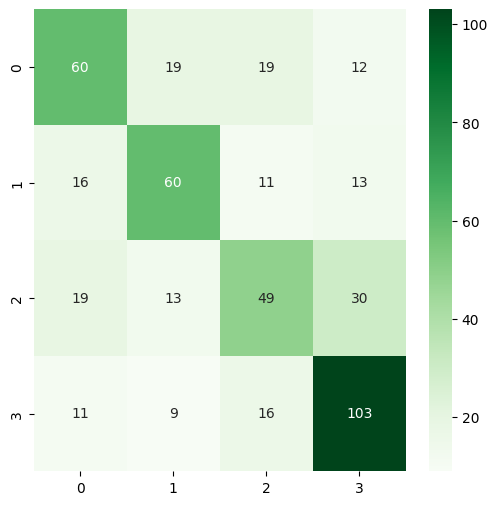

In [42]:
neigh9 = KNeighborsClassifier(n_neighbors=1)
neigh9.fit(X_train9,y_train9)
pred_knn9 = neigh9.predict(X_test9)
Confusion_Matrix(confusion_matrix(y_test9,pred_knn9))
print(classification_report(y_test9, pred_knn9))
print(round(np.sum([y_test9==pred_knn9])/len(y_test9),4)*100,"%")
results.append(['images PCA 500', 'KNN',round(np.sum([y_test9==pred_knn9])/len(y_test9),4)*100 ])

#### Adaboost

In [43]:
for i in range(50,2001,50):
    ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME", random_state=0)
    ada.fit(X_train9,y_train9)
    pred_ada = ada.predict(X_test9)
    print(i,round(np.sum([y_test9==pred_ada])/len(y_test9),4)*100,"%")

50 51.519999999999996 %
100 48.699999999999996 %
150 51.09 %
200 49.57 %
250 53.7 %
300 53.7 %
350 53.910000000000004 %
400 53.26 %
450 54.13 %
500 54.13 %
550 54.56999999999999 %
600 54.35 %
650 54.13 %
700 53.7 %
750 54.13 %
800 53.480000000000004 %
850 52.83 %
900 54.779999999999994 %
950 53.26 %
1000 53.910000000000004 %
1050 54.779999999999994 %
1100 54.13 %
1150 54.779999999999994 %
1200 54.56999999999999 %
1250 53.7 %
1300 53.7 %
1350 53.7 %
1400 54.779999999999994 %
1450 53.04 %
1500 53.480000000000004 %
1550 53.04 %
1600 54.56999999999999 %
1650 53.480000000000004 %
1700 53.480000000000004 %
1750 54.779999999999994 %
1800 55.00000000000001 %
1850 55.00000000000001 %
1900 55.43 %
1950 54.779999999999994 %
2000 54.779999999999994 %


              precision    recall  f1-score   support

           0       0.50      0.50      0.50       110
           2       0.51      0.38      0.43       100
           9       0.47      0.55      0.50       111
          11       0.71      0.73      0.72       139

    accuracy                           0.55       460
   macro avg       0.54      0.54      0.54       460
weighted avg       0.55      0.55      0.55       460

55.43 %


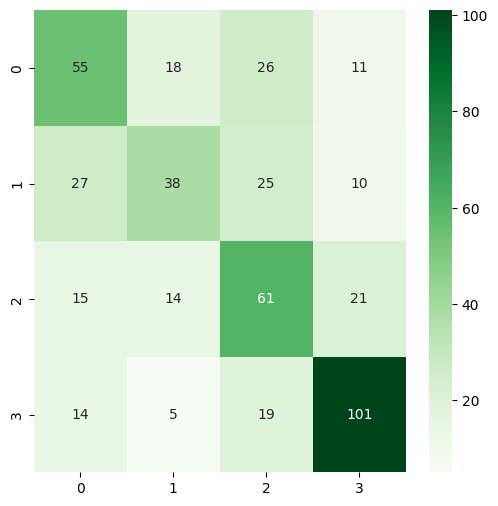

In [44]:
ada9 = AdaBoostClassifier(n_estimators=1900, algorithm="SAMME",random_state=0)
ada9.fit(X_train9,y_train9)
pred_ada9 = ada9.predict(X_test9)
Confusion_Matrix(confusion_matrix(y_test9,pred_ada9))
print(classification_report(y_test9, pred_ada9))
print(round(np.sum([y_test9==pred_ada9])/len(y_test9),4)*100,"%")
results.append(['images PCA 500', 'Adaboost',round(np.sum([y_test9==pred_ada9])/len(y_test9),4)*100 ])

#### Random Forest

In [45]:
for i in range(40,501,20):
    for j in range(2,5):
        RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
        RF.fit(X_train9,y_train9)
        pred_RF = RF.predict(X_test9)
        print(i,j,round(np.sum([y_test9==pred_RF])/len(y_test9),4)*100,"%")

40 2 53.7 %
40 3 53.480000000000004 %
40 4 53.26 %
60 2 55.00000000000001 %
60 3 54.56999999999999 %
60 4 55.22 %
80 2 57.38999999999999 %
80 3 56.3 %
80 4 56.96 %
100 2 56.96 %
100 3 55.43 %
100 4 57.60999999999999 %
120 2 58.040000000000006 %
120 3 57.38999999999999 %
120 4 59.13 %
140 2 57.17 %
140 3 57.830000000000005 %
140 4 61.3 %
160 2 57.830000000000005 %
160 3 58.48 %
160 4 61.09 %
180 2 58.91 %
180 3 58.26 %
180 4 59.78 %
200 2 59.35 %
200 3 58.91 %
200 4 60.650000000000006 %
220 2 58.91 %
220 3 59.78 %
220 4 60.870000000000005 %
240 2 58.91 %
240 3 59.78 %
240 4 61.3 %
260 2 58.91 %
260 3 60.650000000000006 %
260 4 60.650000000000006 %
280 2 58.26 %
280 3 60.650000000000006 %
280 4 61.3 %
300 2 58.699999999999996 %
300 3 59.57 %
300 4 59.57 %
320 2 59.13 %
320 3 60.42999999999999 %
320 4 60.870000000000005 %
340 2 59.57 %
340 3 60.650000000000006 %
340 4 61.09 %
360 2 58.91 %
360 3 60.870000000000005 %
360 4 61.09 %
380 2 59.57 %
380 3 62.17 %
380 4 61.519999999999996 %
400 

              precision    recall  f1-score   support

           0       0.51      0.55      0.53       110
           2       0.80      0.41      0.54       100
           9       0.51      0.59      0.55       111
          11       0.66      0.76      0.71       139

    accuracy                           0.60       460
   macro avg       0.62      0.58      0.58       460
weighted avg       0.62      0.60      0.59       460

59.57 %


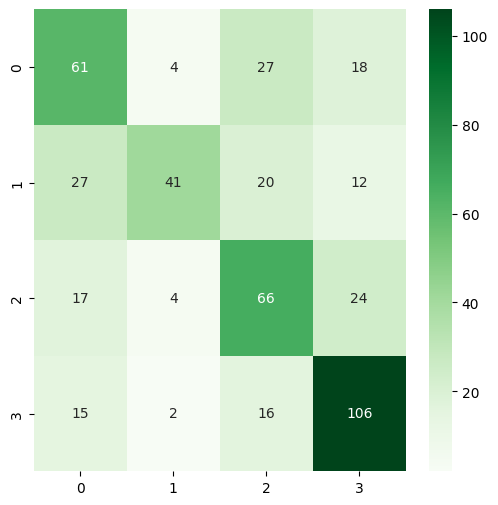

In [46]:
RF9 = RandomForestClassifier(n_estimators=340, max_depth=None,min_samples_split=2, random_state=0)
RF9.fit(X_train9,y_train9)
pred_RF9 = RF9.predict(X_test9)
Confusion_Matrix(confusion_matrix(y_test9,pred_RF9))
print(classification_report(y_test9, pred_RF9))
print(round(np.sum([y_test9==pred_RF9])/len(y_test9),4)*100,"%")
results.append(['images PCA 500', 'Random Forest',round(np.sum([y_test9==pred_RF9])/len(y_test9),4)*100 ])

#### Logistic Regression

In [47]:
penilties = ["l1","l2","elasticnet"]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
tols= [0.1 ,0.01, 0.001]

for i in penilties:
    for j in solvers:
        for k in tols:
            try:
                LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000,random_state=0)
                LR.fit(X_train9,y_train9)
                pred_LR = LR.predict(X_test9)
                print(i,j,k,round(np.sum([y_test9==pred_LR])/len(y_test9),4)*100,"%")
            except:
                pass
        

l1 liblinear 0.1 56.96 %
l1 liblinear 0.01 55.00000000000001 %
l1 liblinear 0.001 54.35 %
l1 saga 0.1 57.830000000000005 %
l1 saga 0.01 57.60999999999999 %
l1 saga 0.001 57.38999999999999 %
l2 lbfgs 0.1 55.87 %
l2 lbfgs 0.01 57.60999999999999 %
l2 lbfgs 0.001 57.60999999999999 %
l2 liblinear 0.1 54.13 %
l2 liblinear 0.01 52.61 %
l2 liblinear 0.001 52.61 %
l2 newton-cg 0.1 57.38999999999999 %
l2 newton-cg 0.01 57.38999999999999 %
l2 newton-cg 0.001 57.17 %
l2 sag 0.1 57.830000000000005 %
l2 sag 0.01 56.089999999999996 %
l2 sag 0.001 57.830000000000005 %
l2 saga 0.1 57.830000000000005 %
l2 saga 0.01 57.60999999999999 %
l2 saga 0.001 57.38999999999999 %


              precision    recall  f1-score   support

           0       0.52      0.54      0.53       110
           2       0.52      0.50      0.51       100
           9       0.55      0.39      0.46       111
          11       0.66      0.82      0.73       139

    accuracy                           0.58       460
   macro avg       0.56      0.56      0.56       460
weighted avg       0.57      0.58      0.57       460

57.830000000000005 %


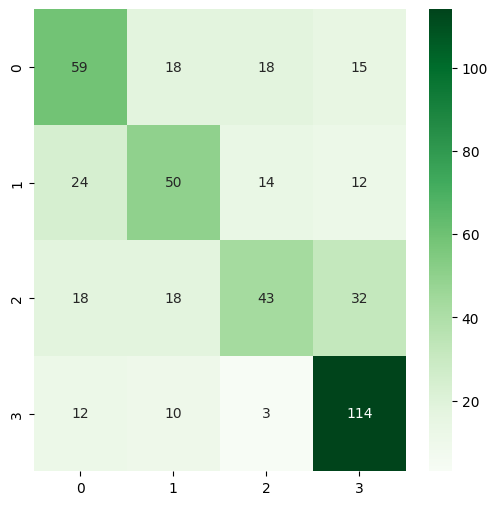

In [48]:
LR9 = LogisticRegression(penalty="l2", solver="sag", tol=0.1, max_iter=10000, random_state=0)
LR9.fit(X_train9,y_train9)
pred_LR9 = LR9.predict(X_test9)
Confusion_Matrix(confusion_matrix(y_test9,pred_LR9))
print(classification_report(y_test9, pred_LR9))
print(round(np.sum([y_test9==pred_LR9])/len(y_test9),4)*100,"%")
results.append(['images PCA 500', 'Logistic Regression',round(np.sum([y_test9==pred_LR9])/len(y_test9),4)*100 ])

In [49]:
cols = ["df_type","classifier","accuracy"]
df = pd.DataFrame(results, columns=cols)

In [50]:
df

,df_type,classifier,accuracy
0,images PCA 100,SVM,45.43
1,images PCA 100,KNN,61.09
2,images PCA 100,Adaboost,54.78
3,images PCA 100,Random Forest,62.39
4,images PCA 100,Logistic Regression,57.17
5,images PCA 200,SVM,49.13
6,images PCA 200,KNN,60.22
7,images PCA 200,Adaboost,53.70
8,images PCA 200,Random Forest,63.26
9,images PCA 200,Logistic Regression,54.57


In [51]:
import pickle
filenames = ['svm6.sav','knn6.sav','ada6.sav','RF6.sav','LR6.sav',
             'svm7.sav','knn7.sav','ada7.sav','RF7.sav','LR7.sav',
             'svm9.sav','knn9.sav','ada9.sav','RF9.sav','LR9.sav']
models= [svm6,neigh6,ada6,RF6,LR6,
        svm7,neigh7,ada7,RF7,LR7,
        svm9,neigh9,ada9,RF9,LR9]

for i in range(len(filenames)): 
    pickle.dump(models[i], open(filenames[i], 'wb'))